# Dungeons And Dragons and Stats

Dungeons and Dragons is a Tabletop Roleplaying game (RPG) produced by Wizards of the coast.

Data from https://github.com/oganm/dnddata

In [32]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


Lets load in the dataset. Note that this is a tab seperated table. We'll use `\t` as the seperator to get it to load in right.

In [33]:
#dnd_df = pd.read_csv("https://raw.githubusercontent.com/ErikSeguinte/dndstats/master/docs/charTable.tsv", sep = '\t')
dnd_df = pd.read_csv('https://raw.githubusercontent.com/oganm/dnddata/master/data-raw/dnd_chars_unique.tsv', sep = '\t')

In [34]:
print(dnd_df.shape)
dnd_df.head()

(4786, 36)


,ip,finger,hash,name,race,background,date,class,justClass,subclass,...,country,countryCode,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,levelGroup,alias
0,fe6a0db,dfa9438,9db89a1c2df98d839bb95fbb4337ffa1,5598141,Fire Genasi,Hermit,2019-12-31T20:40:46Z,Druid 20,Druid,Circle of the Moon,...,United States,US,NaN,NaN,NaN,Genasi,NaN,Quarterstaff|Scimitar,19-20,heuristic_hamilton
1,fe6a0db,dfa9438,c4859de3f51355111d33c17c231b1f1f,5b7f0c0,Kenku,Acolyte,2019-12-31T18:01:13Z,Cleric 20,Cleric,Life Domain,...,United States,US,NaN,NaN,NaN,Kenku,Bless*1|Cure Wounds*1|Lesser Restoration*2|Spi...,"Mace|Crossbow, Light",19-20,pedantic_vaughan
2,fbbc565,acf7615,0ca83c2f792caad71a28e27264c82a3e,ad4efc7,Triton,Haunted One,2019-12-18T22:30:54Z,Warlock 20,Warlock,The Great Old One,...,United States,US,NaN,NaN,NaN,Triton,NaN,Trident,19-20,optimistic_hawking
3,771e3c1,acf7615,a425e37f4210bee779f131cb07ef05a3,14b10ec,Triton,Mercenary Veteran,2019-12-15T17:39:15Z,Monk 20,Monk,Way of the Kensei,...,United States,US,NaN,NaN,NaN,Triton,NaN,Unarmed Strike|Longbow|Trident,19-20,jovial_bassi
4,1c797fe,dbb4eaa,401ef00cd4e04844a75d4ca084e7b309,8090ffe,Goliath,Noble,2019-12-08T12:31:07Z,Paladin 20,Paladin,Oath of Conquest,...,United States,US,NaN,NaN,NaN,Goliath,*|Command*1|Hold Person*2|Spiritual Weapon*2|B...,Warhammer|Javelin,19-20,fervent_rubin


The maintainer of this Dataset already did some processing and cleanup. (See the `Processed*` columns, but we're going to ignore those. This is supposed to be a learning experience, right?

Lets start with classes. What do these values look like?

In [35]:
pd.set_option('display.max_rows', 10)
dnd_df['class'].value_counts()


Rogue 1                  157
Fighter 1                133
Cleric 1                 129
Fighter 3                 97
Bard 1                    97
                        ... 
Artificer 5                1
Fighter 4|Barbarian 5      1
Warlock 11                 1
Bard 1|Warlock 2           1
Fighter 13|Paladin 2       1
Name: class, Length: 732, dtype: int64

Looks like there are a few issues. The first is that Class and level have been combined. So a 1st level wizard is in listed as `Wizard 1`. We'll want to split those up into class and level.

The next thing is multiclassing. Someone can be `wizard 1` and `barbarian 2`. In the data, they are seperated by the `|` character. We'll start by cleaning this up.

First, we'll use the `str.split()` function of the `pd.DataFrame` class to turn this string into a list of strings. Note that rows with only a single class are still turned into a list with 1 element.



In [36]:
dnd_df['class'] = dnd_df['class'].str.split('|')
dnd_df['class']

0                     [Druid 20]
1                    [Cleric 20]
2                   [Warlock 20]
3                      [Monk 20]
4                   [Paladin 20]
                  ...           
4781        [Rogue 1, Warlock 1]
4782        [Bard 1, Sorcerer 1]
4783         [Rogue 1, Ranger 1]
4784        [Fighter 1, Rogue 1]
4785    [Fighter 1, Barbarian 1]
Name: class, Length: 4786, dtype: object

In [37]:
# Drop anyone with more than 2 classes
valid_multiclass = dnd_df['class'].str.len() <= 2
dnd_df = dnd_df[valid_multiclass]


In [38]:
# Split Class list into 2 columns, class 1 and 2
dnd_df[['class1', 'class2']] = pd.DataFrame(dnd_df['class'].values.tolist(), index = dnd_df.index)


In [39]:
dnd_df.sample(5)

,ip,finger,hash,name,race,background,date,class,justClass,subclass,...,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,levelGroup,alias,class1,class2
3558,27f1233,NaN,e5501d607d211f65d55787b131b5703f,2094337,Goblin,Urchin,2019-05-01T09:02:22Z,[Bard 1],Bard,NaN,...,NG,NaN,NaN,Goblin,Minor Illusion*0|Vicious Mockery*0|Cure Wounds...,Rapier|Dagger,1-3,focused_chandrasekhar,Bard 1,None
838,NaN,fe4cf17,4ef88a96a83fc865263e9ec97a5fc1a3,df78bed,Wood Elf,Urban Bounty Hunter,2018-12-30T01:02:28Z,[Monk 7],Monk,Way of Shadow,...,NG,NaN,NaN,Elf,Minor Illusion*0,Quarterstaff|Dart|Unarmed Strike|Longbow|Short...,4-7,nervous_keldysh,Monk 7,None
2641,NaN,8ae8f2f,c7f36c33902c56d922a3ff1715cbe850,d30b9a2,Human,Entertainer,2018-09-27T03:14:56Z,[Bard 3],Bard,College of Glamour,...,NaN,NaN,NaN,Human,Prestidigitation*0|Vicious Mockery*0|Detect Ma...,Rapier|Dagger,1-3,mystifying_kalam,Bard 3,None
3107,NaN,108136f,76d577c2aedb3c78138ff98923c94ce6,cd9db84,Water Genasi,Haunted One,2019-12-07T00:46:30Z,[Druid 1],Druid,NaN,...,NaN,NaN,NaN,Genasi,NaN,Scimitar,1-3,adoring_euler,Druid 1,None
1145,1f422c3,762637d,d2086c036f2d895bf7fbdc361c7f4be0,ee91487,Dragonborn,Soldier,2019-12-27T22:35:08Z,[Barbarian 5],Barbarian,Path of the Ancestral Guardian,...,NaN,NaN,NaN,Dragonborn,NaN,Greataxe|Handaxe|Javelin,4-7,vigorous_merkle,Barbarian 5,None


In [40]:
dnd_df[['just_class1', 'just_level1']] = pd.DataFrame(dnd_df['class1'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)
dnd_df[['just_class2', 'just_level2']] = pd.DataFrame(dnd_df['class2'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)

In [42]:
dnd_df[dnd_df['just_class2'] == 'Revised Ranger'].shape

(4, 42)

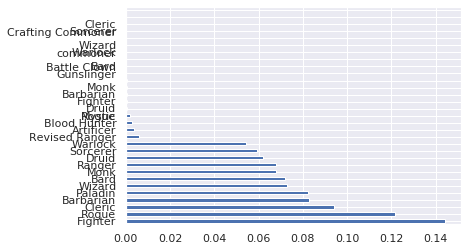

In [43]:
dnd_df['just_class1'].value_counts(normalize=True).plot(kind='barh');

In [44]:
def graph_counts(df, label):
  ax = sns.countplot(x = label, data=df,)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

def graph_series(s):
  ax = sns.countplot(x = s.index, data=s)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

def clean_string(s:str):
    if isinstance(s, str):
        split = s.split(' ')
        return split[-1].strip().title()

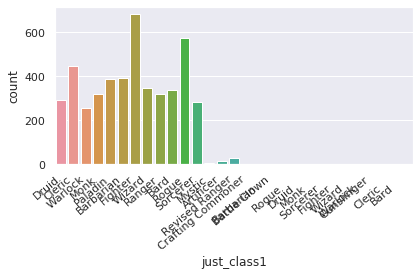

In [45]:
# Drop weird classes 
weird_classes = ['Blood Hunter', 'commoner', 'mystic']
for class_ in weird_classes:
  dnd_df = dnd_df[dnd_df['just_class1'] != class_]

graph_counts(dnd_df, 'just_class1')

In [47]:
class_df = pd.concat([dnd_df['just_class1'], dnd_df['just_class2']], ignore_index=True)
class_df = class_df.apply(clean_string)
print(class_df.shape)
class_df.value_counts()

(9424,)


Fighter       756
Rogue         653
Cleric        481
Barbarian     421
Paladin       401
             ... 
Mystic         11
Commoner        1
Gunslinger      1
Clown           1
                1
Length: 18, dtype: int64

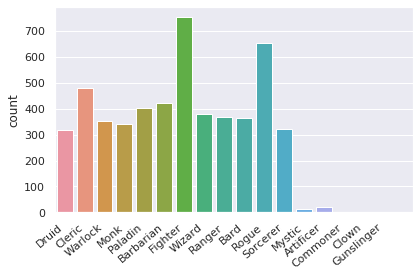

In [28]:
graph_series(class_df)

In [51]:
dnd_df['just_class1'].value_counts()

Fighter           232
Rogue             140
Barbarian         128
Paladin           122
Cleric            108
                 ... 
Warlock            71
Bard               63
Revised Ranger     11
Mystic              4
Artificer           2
Name: just_class1, Length: 15, dtype: int64

In [48]:
second_class_df = dnd_df[dnd_df['just_class2'].notnull()].copy()

In [49]:
second_class_df[['just_class1', 'just_level1']] = second_class_df[['just_class2', 'just_level2']].copy()

In [50]:
single_class_df = pd.concat([dnd_df, second_class_df.copy()]).copy()

In [55]:
single_class_df = single_class_df.drop(['date','class','processedRace', 'processedWeapons','processedSpells'],axis = 1)


KeyError: "['date' 'class' 'processedRace' 'processedWeapons' 'processedSpells'] not found in axis"

In [57]:
single_class_df['just_class1'] = single_class_df['just_class1'].apply(clean_string)
single_class_df['just_class1'].value_counts()

Fighter       756
Rogue         653
Cleric        481
Barbarian     421
Paladin       401
             ... 
Mystic         11
Commoner        1
Gunslinger      1
Clown           1
                1
Name: just_class1, Length: 18, dtype: int64

In [81]:
unusual_classes = single_class_df['just_class1'].value_counts()[12:].index.to_list()
unusual_classes

['Artificer', 'Mystic', 'Gunslinger', 'Commoner', 'Clown']

In [84]:
single_class_df = single_class_df[~(single_class_df['just_class1'].isin(unusual_classes))]

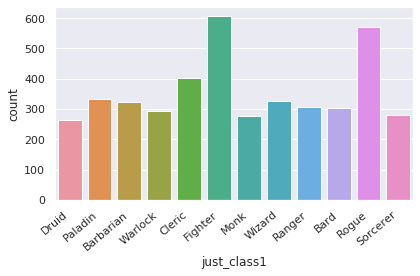

In [85]:
graph_counts(single_class_df, 'just_class1')

In [86]:
race_and_class = pd.crosstab(single_class_df['just_class1'], single_class_df['race']).T

In [87]:
race_and_class

just_class1,Barbarian,Bard,Cleric,Druid,Fighter,Monk,Paladin,Ranger,Rogue,Sorcerer,Warlock,Wizard
race,,,,,,,,,,,,
Aasimar,4,11,24,1,8,7,49,6,9,27,30,3
Dragonborn,32,11,23,4,49,19,52,16,10,32,22,4
Dwarf,60,10,85,18,51,13,25,12,16,7,3,9
Elf,11,19,53,63,61,51,26,86,99,31,23,80
Firbolg,6,3,13,39,8,2,2,5,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Halfling,10,30,10,18,24,16,3,20,86,8,7,14
Human,67,63,110,39,236,81,86,70,146,69,68,91
Tabaxi,2,20,4,9,20,30,5,18,52,1,8,1


Races are mixed in with subraces, which makes it more difficult to classify.

`Wood Elf` should really just be `Elf`, with a subrace of `Wood Elf`

For the most part, we can classify them by splitting them and taking the second last word.

In [88]:
def clean_race(s:str):
    if isinstance(s, str):
        split = s.split(' ')
        return split[-1].strip().title()


        

In [89]:
single_class_df['race'] = single_class_df['race'].apply(clean_race)
single_class_df

/home/primefactorx01/miniconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ip,finger,hash,name,race,background,justClass,subclass,level,feats,...,good,lawful,levelGroup,alias,class1,class2,just_class1,just_level1,just_class2,just_level2
0,fe6a0db,dfa9438,9db89a1c2df98d839bb95fbb4337ffa1,5598141,Genasi,Hermit,Druid,Circle of the Moon,20,NaN,...,NaN,NaN,19-20,heuristic_hamilton,Druid 20,None,Druid,20,None,None
4,1c797fe,dbb4eaa,401ef00cd4e04844a75d4ca084e7b309,8090ffe,Goliath,Noble,Paladin,Oath of Conquest,20,NaN,...,NaN,NaN,19-20,fervent_rubin,Paladin 20,None,Paladin,20,None,None
5,1c797fe,dbb4eaa,a23fadd72194c1310cf071000cd937a8,36ffe96,Human,Sailor,Barbarian,Path of the Storm Herald,20,Polearm Master|Tough,...,NaN,NaN,19-20,focused_fermat,Barbarian 20,None,Barbarian,20,None,None
6,866b531,6cc1b03,beba19fcc2b0721c977926d9b5323d1c,a6592c6,Half-Orc,Sailor,Warlock,The Great Old One,20,War Caster|Actor|Observant,...,NaN,NaN,19-20,upbeat_buck,Warlock 20,None,Warlock,20,None,None
8,a55090c,NaN,8908380455da910fe72ce894afdb0fb1,7409fd0,Half-Elf,Acolyte,Paladin,Oath of Vengeance,20,NaN,...,NaN,NaN,19-20,ecstatic_roentgen,Paladin 20,None,Paladin,20,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,d3f6bf4,86ec0fd,69ef9a29f01f232cb8aa302821e5a05d,9788f58,Tabaxi,Custom,Monk|Fighter,|,2,NaN,...,NaN,NaN,1-3,optimistic_cray,Monk 1,Fighter 1,Fighter,1,Fighter,1
4781,1379386,405bb01,5669c97b4da60648f1ec8de44679818c,c8587a6,Genasi,Haunted One,Rogue|Warlock,|The Undying,2,NaN,...,NaN,NaN,1-3,focused_proskuriakova,Rogue 1,Warlock 1,Warlock,1,Warlock,1
4783,0c356c2,5920c35,84aea436941c2d2768600f1fe1e9e92f,4d52069,Human,Urchin,Rogue|Ranger,|,2,NaN,...,NaN,NaN,1-3,recursing_payne,Rogue 1,Ranger 1,Ranger,1,Ranger,1
4784,9f8d490,NaN,0075e26c05ab86b5a39db1b9b51c0536,faecead,Human,Noble,Fighter|Rogue,|,2,NaN,...,NaN,NaN,1-3,naughty_ganguly,Fighter 1,Rogue 1,Rogue,1,Rogue,1


In [90]:
counts = single_class_df['race'].value_counts()
counts

Human         1126
Elf            603
Half-Elf       325
Dwarf          309
Dragonborn     274
              ... 
Goliath        107
Goblin          88
Firbolg         83
Variant         78
Genasi          76
Name: race, Length: 16, dtype: int64

I think we might have a few home brew or other unusual races. Lets say any races with a frequency of 5 or less is unusual and we'll go ahead and drop them

In [91]:
unusual_races = counts[16:].index.tolist()



In [92]:
single_class_df = single_class_df[~(single_class_df['race'].isin(unusual_races))]



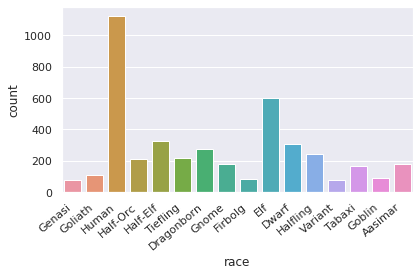

In [93]:
graph_counts(single_class_df, 'race')

In [98]:
race_and_class = pd.crosstab(single_class_df['race'], single_class_df['just_class1'])
race_and_class_margins = pd.crosstab(single_class_df['race'], single_class_df['just_class1'], margins = True)

In [100]:
race_and_class_margins

just_class1,Barbarian,Bard,Cleric,Druid,Fighter,Monk,Paladin,Ranger,Rogue,Sorcerer,Warlock,Wizard,All
race,,,,,,,,,,,,,
Aasimar,4,11,24,1,8,7,49,6,9,27,30,3,179
Dragonborn,32,11,23,4,49,19,52,16,10,32,22,4,274
Dwarf,60,10,85,18,51,13,25,12,16,7,3,9,309
Elf,11,19,53,63,61,51,26,86,99,31,23,80,603
Firbolg,6,3,13,39,8,2,2,5,2,0,1,2,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Human,67,63,110,39,236,81,86,70,146,69,68,91,1126
Tabaxi,2,20,4,9,20,30,5,18,52,1,8,1,170
Tiefling,3,24,11,6,13,8,11,9,34,28,51,20,218


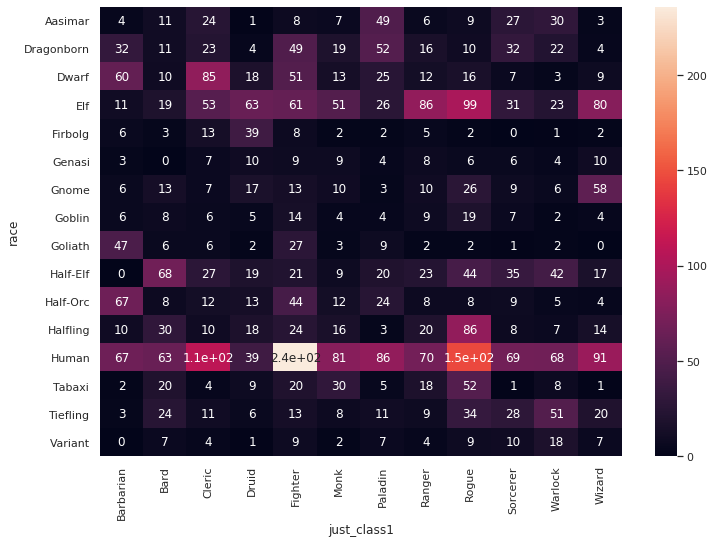

In [101]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(race_and_class, annot = True)



In [102]:
fig = go.Figure(
    data = go.Heatmap(
        z=race_and_class,
        x=race_and_class.columns,
        y=race_and_class.index)
)
fig.update_layout(
    autosize=False,
    width = 800,
    height=800
)
fig.show()

## Alignments

In [110]:
race_and_good = pd.crosstab(single_class_df['race'], single_class_df['good'], normalize='index')

In [116]:
single_class_df['processedAlignment'].value_counts(normalize=True)

CN    0.247059
CG    0.229804
NG    0.176471
NN    0.107451
LN    0.088627
LG    0.087843
LE    0.026667
NE    0.018824
CE    0.017255
Name: processedAlignment, dtype: float64

In [105]:
single_class_df['good'].value_counts(normalize=True)

Series([], Name: good, dtype: float64)

In [106]:
single_class_df['lawful'].value_counts(normalize=True)

Series([], Name: lawful, dtype: float64)

In [107]:
pd.crosstab(single_class_df['good'], single_class_df['lawful'], normalize='all')

""
